# <b><span style='color:#F1A424'>AutoML - Regression - Fish Weight Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.7.
- Outlier filteration with 'tukey' method and imputation with median for outlier in 'Length2' feature.
- Feature scaling with 'std' method.
- Replacement of customized value in hyperparameter 'max_depth' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [5]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [6]:
# first 5 rows
fish_df.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,725,31.8,35.0,40.9,16.36,6.0532
Bream,920,35.0,38.5,44.1,18.0369,6.3063
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,680,31.8,35.0,40.6,15.4686,6.1306
Bream,430,26.5,29.0,34.0,12.444,5.134
Bream,450,26.8,29.7,34.7,13.6024,4.9274
Bream,685,31.4,34.0,39.2,15.9936,5.3704
Bream,600,29.4,32.0,37.2,15.438,5.58
Bream,450,27.6,30.0,35.1,14.0049,4.8438
Bream,500,26.8,29.7,34.5,14.1795,5.2785


In [7]:
# fish_df dataset
fish_df.shape

(159, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
fish_df_sample = fish_df.sample(frac = [0.8, 0.2])

In [9]:
fish_df_sample.head()

Species,Weight,Length1,Length2,Length3,Height,Width,sampleid
Bream,242,23.2,25.4,30.0,11.52,4.02,2
Bream,575,31.3,34.0,39.5,15.1285,5.5695,1
Bream,925,36.2,39.5,45.3,18.7542,6.7497,1
Bream,340,23.9,26.5,31.1,12.3778,4.6961,1
Bream,500,29.1,31.5,36.4,13.7592,4.368,1
Bream,475,28.4,31.0,36.2,14.2628,5.1042,1
Bream,1000,33.5,37.0,42.6,18.957,6.603,2
Bream,500,26.8,29.7,34.5,14.1795,5.2785,1
Bream,600,29.4,32.0,37.2,15.438,5.58,2
Bream,700,30.4,33.0,38.3,14.8604,5.2854,1


In [10]:
# Fetching train and test data
fish_df_train= fish_df_sample[fish_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fish_df_test = fish_df_sample[fish_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
fish_df_train.shape

(127, 7)

In [12]:
# test data shape
fish_df_test.shape

(32, 7)

In [13]:
#train dataset
fish_df_train.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,500,28.5,30.7,36.2,14.2266,4.9594
Bream,500,29.1,31.5,36.4,13.7592,4.368
Bream,340,29.5,32.0,37.3,13.9129,5.0728
Bream,600,29.4,32.0,37.2,14.9544,5.1708
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,610,30.9,33.5,38.6,15.633,5.1338
Bream,700,30.4,33.0,38.3,14.8604,5.2854
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,450,27.6,30.0,35.1,14.0049,4.8438
Bream,450,26.8,29.7,34.7,13.6024,4.9274


In [14]:
# test dataset
fish_df_test.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,390,27.6,30.0,35.0,12.67,4.69
Bream,242,23.2,25.4,30.0,11.52,4.02
Bream,1000,33.5,37.0,42.6,18.957,6.603
Bream,600,29.4,32.0,37.2,15.438,5.58
Parkki,120,17.5,19.0,21.3,8.3922,2.9181
Parkki,170,19.0,20.7,23.2,9.396,3.4104
Parkki,150,18.4,20.0,22.4,8.8928,3.2928
Bream,955,35.0,38.5,44.0,18.084,6.292
Bream,720,32.0,35.0,40.6,16.3618,6.09
Bream,975,37.4,41.0,45.9,18.6354,6.7473


In [16]:
AutoML.generate_custom_config("custom_fish_weight")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  1

Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Feat

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [17]:
# Creating AutoML instance
# Excluded 'glm' and 'xgboost' from model training.
# Keeping early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging
# Using custom config json for custom run

aml = AutoML(task_type="Regression", 
             exclude=['glm', 'xgboost'],
             max_runtime_secs=200,
             verbose=2,
             custom_config_file='custom_fish_weight.json')


Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.7,
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "tukey",
    "OutlierFilterParam": {
        "Length2": {
            "replacement_value": "median"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "std",
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "xgboost": {
            "max_depth": {
                "Method": "REPLACE",
                "Value": [
                    4,
                    5,
                    8,
                    10
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 127
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0
Width,FLOAT,127,0,None,0,127,0,0.0,100.0
Height,FLOAT,127,0,None,0,127,0,0.0,100.0
Weight,INTEGER,127,0,None,0,127,0,0.0,100.0
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0



Statistics of Data:


func,Weight,Length1,Length2,Length3,Height,Width
50%,300,26.3,28.7,31.2,7.792,4.368
count,127,127,127,127,127,127
mean,414.047,26.814,29.001,31.838,9.05,4.502
min,5,7.5,8.4,8.8,1.728,1.048
max,1600,56,60,64,18.754,8.142
75%,682.5,33.25,36,40.15,12.406,5.658
25%,132.5,20,22,23.5,5.945,3.53
std,351.567,9.924,10.625,11.451,4.197,1.689



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         

No Futile columns found.

Target Column Distribution:


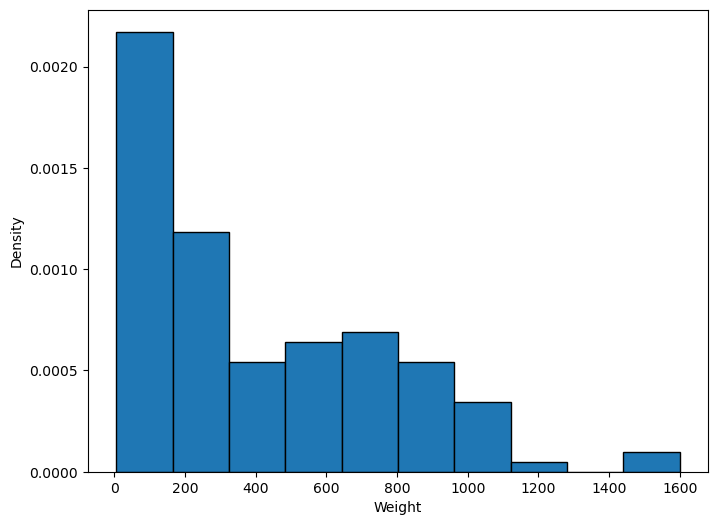

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length2           1.574803
1    Length1           1.574803
2     Weight           1.574803


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 23% - 5/21


AutoML will proceed with default encoding technique.                                     


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265586472718"' - 6/21


['Species']


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,620,31.5,34.5,39.7,15.5227,5.2801,50
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,74
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,82
1,0,0,0,0,0,0,430,26.5,29.0,34.0,12.444,5.134,90
1,0,0,0,0,0,0,290,24.0,26.3,31.2,12.48,4.3056,106
1,0,0,0,0,0,0,500,28.7,31.0,36.2,14.3714,4.8146,114
0,1,0,0,0,0,0,200,21.2,23.0,25.8,10.3458,3.6636,24
0,1,0,0,0,0,0,300,24.0,26.0,29.0,11.368,4.234,40
0,1,0,0,0,0,0,140,19.0,20.7,23.2,8.5376,3.2944,48
0,1,0,0,0,0,0,145,19.8,21.5,24.1,9.7364,3.1571,56


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.7                                                                       
Testing size  : 0.3                                                                       


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,680,31.8,35.0,40.6,15.4686,6.1306,58
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,74
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,82
1,0,0,0,0,0,0,430,26.5,29.0,34.0,12.444,5.134,90
1,0,0,0,0,0,0,290,24.0,26.3,31.2,12.48,4.3056,106
1,0,0,0,0,0,0,500,28.7,31.0,36.2,14.3714,4.8146,114
0,1,0,0,0,0,0,273,23.0,25.0,28.0,11.088,4.144,8
0,0,0,0,0,1,0,8,10.8,11.3,12.6,1.9782,1.2852,15
0,0,0,1,0,0,0,345,36.0,38.5,41.0,6.396,3.977,21
0,0,0,0,0,1,0,12,12.1,13.0,13.8,2.277,1.2558,23


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,925,36.2,39.5,45.3,18.7542,6.7497,42
1,0,0,0,0,0,0,475,28.4,31.0,36.2,14.2628,5.1042,122
1,0,0,0,0,0,0,950,38.0,41.0,46.5,17.6235,6.3705,154
1,0,0,0,0,0,0,600,29.4,32.0,37.2,14.9544,5.1708,186
1,0,0,0,0,0,0,725,31.8,35.0,40.9,16.36,6.0532,202
0,0,0,0,1,0,0,145,20.5,22.0,24.3,6.6339,3.5478,12
0,0,0,1,0,0,0,300,32.7,35.0,38.8,5.9364,4.3844,13
0,1,0,0,0,0,0,90,16.3,17.7,19.8,7.4052,2.673,16
0,0,0,0,1,0,0,150,20.4,22.0,24.7,5.8045,3.7544,20
0,0,0,1,0,0,0,300,31.7,34.0,37.8,5.7078,4.158,37


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length3           9.448819
1    Length1           9.448819
2    Length2           9.448819
3      Width           9.448819
4     Weight           8.661417
5         id           9.448819
6     Height           9.448819
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265067256214"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266305825272"' - 12/21
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__17192

['Species_0', 'Species_4', 'Species_3', 'Species_5', 'Species_1', 'Species_6', 'Species_2', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Species_0,Species_4,Species_3,Weight,Species_5,id,Species_1,Species_6,Species_2,Length1,Length2,Length3,Height,Width
0,0,0,8,1,15,0,0,0,-1.5795465017949906,-2.074193513474164,-1.6503988114495387,-1.7370274383121174,-1.8704914843731173
0,0,0,12,1,23,0,0,0,-1.4544339075934074,-1.8747210593627375,-1.5496693498329215,-1.6641765900850094,-1.8873923588982218
0,0,0,200,0,24,1,0,0,-0.5786457481823233,-0.7013536822367002,-0.5423747336667484,0.30308888573456494,-0.5032452268728268
0,1,0,290,0,28,0,0,0,-0.30917246836352813,-0.34934346909888914,-0.25697459241966614,-0.05507007024141126,-0.024272143392654384
0,0,0,9,1,31,0,0,0,-1.53142627325592,-2.015525144617862,-1.6084282024426149,-1.6795610898277487,-1.9390722439256671
0,0,0,55,0,32,1,0,0,-1.3196972676840097,-1.6752486052513114,-1.3230280611955325,-0.5498365572135335,-1.2718901019584468
0,0,1,456,0,29,0,0,0,1.2306748448867295,1.5867127031590722,1.1112672612060523,-0.4443881239530777,-0.12447018522005994
0,0,1,345,0,21,0,0,0,0.8457130165741651,1.1173657523086573,0.7335317801437374,-0.659917407195258,-0.32308420387392395
1,0,0,650,0,10,0,0,0,0.36451073118345956,0.5306820637456388,0.5404669787118879,1.3095423712817593,0.6832651479508356
0,0,0,273,0,8,1,0,0,-0.40541292544166924,-0.46668020681149286,-0.35770405403628336,0.4840457115516983,-0.22708263769390846


Species_0,Species_4,Species_3,Weight,Species_5,id,Species_1,Species_6,Species_2,Length1,Length2,Length3,Height,Width
1,0,0,475,0,122,0,0,0,0.11428554278029256,0.2373402194641295,0.3306139336772685,1.2580981645350398,0.3248976248572932
1,0,0,950,0,154,0,0,0,1.0381939307304473,1.4107075965901668,1.1952084792199,2.0774751579648982,1.0528424347600085
0,0,1,567,0,45,0,0,0,1.5386443075367813,1.9973912851531854,1.3798791588503654,-0.31955668388520875,0.19026548833418214
1,0,0,600,0,186,0,0,0,0.21052599985843368,0.3546769571767332,0.41455515169111623,1.426718133189216,0.3631832793937545
1,0,0,725,0,202,0,0,0,0.4415030968459725,0.7066871703145444,0.7251376583423526,1.7694194460005377,0.8704394590179796
0,0,0,145,0,56,1,0,0,-0.7133823880917207,-0.8773587888056059,-0.6850748042902896,0.15451021468503465,-0.7944116536403586
0,0,1,430,0,53,0,0,0,0.7975927880350945,1.0586973834523556,0.6915611711368136,-0.4419500098892522,0.021544172921999574
0,0,1,300,0,37,0,0,0,0.4318790511381583,0.5893504326019406,0.4649198824994244,-0.8277084170677336,-0.21903460220576335
0,0,0,90,0,16,1,0,0,-1.0502239878652146,-1.3232383921135,-1.046022041749835,-0.4138629358739817,-1.072701223626858
1,0,0,925,0,42,0,0,0,0.8649611079897935,1.234702490021261,1.0944790176032826,2.3531527151616554,1.270829224553193


['Species_0', 'Species_3', 'Species_5', 'Species_6', 'Species_2', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']


Weight,r_Species_2,r_Species_6,r_Species_3,r_Species_0,id,r_Species_5,r_Length1,r_Length2,r_Length3,r_Height,r_Width
8,0,0,0,0,15,1,-1.5795465017949906,-2.074193513474164,-1.6503988114495387,-1.7370274383121174,-1.8704914843731173
12,0,0,0,0,23,1,-1.4544339075934074,-1.8747210593627375,-1.5496693498329215,-1.6641765900850094,-1.8873923588982218
200,0,0,0,0,24,0,-0.5786457481823233,-0.7013536822367002,-0.5423747336667484,0.30308888573456494,-0.5032452268728268
290,0,0,0,0,28,0,-0.30917246836352813,-0.34934346909888914,-0.25697459241966614,-0.05507007024141126,-0.024272143392654384
9,0,0,0,0,31,1,-1.53142627325592,-2.015525144617862,-1.6084282024426149,-1.6795610898277487,-1.9390722439256671
55,0,0,0,0,32,0,-1.3196972676840097,-1.6752486052513114,-1.3230280611955325,-0.5498365572135335,-1.2718901019584468
456,0,0,1,0,29,0,1.2306748448867295,1.5867127031590722,1.1112672612060523,-0.4443881239530777,-0.12447018522005994
345,0,0,1,0,21,0,0.8457130165741651,1.1173657523086573,0.7335317801437374,-0.659917407195258,-0.32308420387392395
650,0,0,0,1,10,0,0.36451073118345956,0.5306820637456388,0.5404669787118879,1.3095423712817593,0.6832651479508356
273,0,0,0,0,8,0,-0.40541292544166924,-0.46668020681149286,-0.35770405403628336,0.4840457115516983,-0.22708263769390846


Weight,r_Species_2,r_Species_6,r_Species_3,r_Species_0,id,r_Species_5,r_Length1,r_Length2,r_Length3,r_Height,r_Width
475,0,0,0,1,122,0,0.11428554278029256,0.2373402194641295,0.3306139336772685,1.2580981645350398,0.3248976248572932
950,0,0,0,1,154,0,1.0381939307304473,1.4107075965901668,1.1952084792199,2.0774751579648982,1.0528424347600085
567,0,0,1,0,45,0,1.5386443075367813,1.9973912851531854,1.3798791588503654,-0.31955668388520875,0.19026548833418214
600,0,0,0,1,186,0,0.21052599985843368,0.3546769571767332,0.41455515169111623,1.426718133189216,0.3631832793937545
725,0,0,0,1,202,0,0.4415030968459725,0.7066871703145444,0.7251376583423526,1.7694194460005377,0.8704394590179796
145,0,0,0,0,56,0,-0.7133823880917207,-0.8773587888056059,-0.6850748042902896,0.15451021468503465,-0.7944116536403586
430,0,0,1,0,53,0,0.7975927880350945,1.0586973834523556,0.6915611711368136,-0.4419500098892522,0.021544172921999574
300,0,0,1,0,37,0,0.4318790511381583,0.5893504326019406,0.4649198824994244,-0.8277084170677336,-0.21903460220576335
90,0,0,0,0,16,0,-1.0502239878652146,-1.3232383921135,-1.046022041749835,-0.4138629358739817,-1.072701223626858
925,0,0,0,1,42,0,0.8649611079897935,1.234702490021261,1.0944790176032826,2.3531527151616554,1.270829224553193


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Species_0,Species_4,Species_3,Weight,Species_5,id,Species_1,Species_6,Species_2,Length1,Length2,Length3,Height,Width
1,0,0,850,0,82,0,0,0,0.5377435539241133,0.8240239080271493,0.7838965109520469,1.898541966820741,0.9539090842235972
1,0,0,290,0,106,0,0,0,-0.3091724683635282,-0.3141424477851072,-0.08909215639197003,0.8234311892362183,-0.13418531377360673
1,0,0,500,0,114,0,0,0,0.14315767990373499,0.23734021946413042,0.3306139336772691,1.284576083268186,0.15841826218823662
1,0,0,363,0,130,0,0,0,-0.08781941708380357,0.0026667440389228888,0.1039726450398799,0.8843840408318574,-0.04801384808268296
1,0,0,450,0,146,0,0,0,0.037293177117779956,0.12000348175152666,0.23827859386203645,1.1952192028289788,0.17520416477779588
1,0,0,920,0,162,0,0,0,0.7494725594960241,1.1173657523086586,0.9937495559866664,2.178266793363448,1.0159364434500862
0,0,1,345,0,21,0,0,0,0.8457130165741652,1.1173657523086586,0.7335317801437382,-0.6599174071952577,-0.32308420387392445
0,0,0,200,0,24,1,0,0,-0.5786457481823234,-0.7013536822366997,-0.5423747336667479,0.30308888573456544,-0.5032452268728274
0,1,0,290,0,28,0,0,0,-0.3091724683635282,-0.3493434690988884,-0.2569745924196656,-0.055070070241410835,-0.024272143392654894
0,0,1,456,0,29,0,0,0,1.2306748448867297,1.5867127031590738,1.1112672612060532,-0.44438812395307736,-0.12447018522006045


Species_0,Species_4,Species_3,Weight,Species_5,id,Species_1,Species_6,Species_2,Length1,Length2,Length3,Height,Width
1,0,0,925,0,42,0,0,0,0.8649611079897938,1.2347024900212624,1.0944790176032833,2.3531527151616562,1.2708292245531925
1,0,0,475,0,122,0,0,0,0.11428554278029258,0.23734021946413042,0.3306139336772691,1.2580981645350406,0.3248976248572927
1,0,0,950,0,154,0,0,0,1.0381939307304475,1.410707596590168,1.195208479219901,2.077475157964899,1.0528424347600078
1,0,0,600,0,186,0,0,0,0.2105259998584337,0.3546769571767342,0.4145551516911169,1.4267181331892167,0.363183279393754
1,0,0,725,0,202,0,0,0,0.4415030968459726,0.7066871703145455,0.7251376583423533,1.7694194460005386,0.870439459017979
0,1,0,145,0,12,0,0,0,-0.6460140681370221,-0.8186904199493035,-0.6682865606875196,-0.6019146736168475,-0.5698139775533411
0,0,1,300,0,13,0,0,0,0.5281195082162998,0.7066871703145455,0.5488611005132729,-0.7719731295686808,-0.08888637116890477
0,0,0,90,0,16,1,0,0,-1.0502239878652149,-1.3232383921134998,-1.0460220417498345,-0.4138629358739814,-1.0727012236268585
0,1,0,150,0,20,0,0,0,-0.6556381138448364,-0.8186904199493035,-0.6347100734819805,-0.8041318540705401,-0.4510479681354299
0,0,1,300,0,37,0,0,0,0.43187905113815833,0.5893504326019418,0.46491988249942506,-0.8277084170677333,-0.21903460220576385


['col_0', 'col_1', 'col_2', 'col_3', 'col_4']


Automl Running: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 80% - 17/21
Passed model xgboost is not available for training.
                                                                                          
Completed customized hyperparameter update.


response_column : Weight                                                                                                                              
name : knn
model_type : Regression
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Weight
name : svm
model_type : regression
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
tolerance : (0.001, 0.01)
learning_rate : ('Invtime', 'Adaptive', 'constant')
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
nesterov : True
intercept : True
iter_num_no_change : (5, 10, 50)
local_sgd_iterations  : (10, 20)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for svm : 15552
-------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265576809261"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266051070609"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269641191309"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265895411325"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265866584391"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265228649416"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265235561393"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719272862533797"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266053887160"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_8,pca,36.211839,2371.638960,0.037129,48.699476,0.192690,0.975797,0.972130
1,2,KNN_4,rfe,37.042925,2468.084425,0.066792,49.679819,0.258441,0.974813,0.965818
2,3,KNN_0,lasso,37.424751,2485.402708,0.041486,49.853813,0.203681,0.974636,0.962930
3,4,KNN_9,lasso,42.152893,3172.844643,0.110092,56.328009,0.331801,0.967621,0.952677
4,5,DECISIONFOREST_1,rfe,49.562271,4374.187118,0.161862,66.137638,0.402321,0.955361,0.939418
5,6,DECISIONFOREST_0,lasso,49.562271,4374.187118,0.161862,66.137638,0.402321,0.955361,0.934758
6,7,DECISIONFOREST_2,pca,47.484829,5064.104720,0.032911,71.162523,0.181414,0.948320,0.940490
7,8,DECISIONFOREST_3,lasso,203.906410,55579.327500,1.257591,235.752683,1.121423,0.432807,0.171025
8,9,SVM_3,lasso,355.051282,222648.743590,8.239819,471.856698,2.870509,-1.272155,-2.320842
9,10,SVM_2,pca,369.666667,234643.564103,0.000000,484.400211,0.000000,-1.394564,-1.757376


In [18]:
# Fitting train data
aml.fit(fish_df_train, fish_df_train.Weight)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [19]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_8,pca,36.211839,2371.638960,0.037129,48.699476,0.192690,0.975797,0.972130
1,2,KNN_4,rfe,37.042925,2468.084425,0.066792,49.679819,0.258441,0.974813,0.965818
2,3,KNN_0,lasso,37.424751,2485.402708,0.041486,49.853813,0.203681,0.974636,0.962930
3,4,KNN_9,lasso,42.152893,3172.844643,0.110092,56.328009,0.331801,0.967621,0.952677
4,5,DECISIONFOREST_1,rfe,49.562271,4374.187118,0.161862,66.137638,0.402321,0.955361,0.939418
5,6,DECISIONFOREST_0,lasso,49.562271,4374.187118,0.161862,66.137638,0.402321,0.955361,0.934758
6,7,DECISIONFOREST_2,pca,47.484829,5064.104720,0.032911,71.162523,0.181414,0.948320,0.940490
7,8,DECISIONFOREST_3,lasso,203.906410,55579.327500,1.257591,235.752683,1.121423,0.432807,0.171025
8,9,SVM_3,lasso,355.051282,222648.743590,8.239819,471.856698,2.870509,-1.272155,-2.320842
9,10,SVM_2,pca,369.666667,234643.564103,0.000000,484.400211,0.000000,-1.394564,-1.757376


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [20]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_8,pca,36.211839,2371.63896,0.037129,48.699476,0.19269,0.975797,0.97213


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(fish_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719272485352162"'⫾⫾⫾｜ 46% - 7/15


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
0,1,0,0,0,0,0,150,18.4,20.0,22.4,8.8928,3.2928,24
0,0,1,0,0,0,0,120,20.0,22.0,23.5,6.11,3.4075,48
0,0,1,0,0,0,0,115,19.0,21.0,22.5,5.9175,3.3075,56
0,0,1,0,0,0,0,85,18.2,20.0,21.0,5.082,2.772,64
0,0,1,0,0,0,0,225,22.0,24.0,25.5,7.293,3.723,80
0,0,1,0,0,0,0,690,34.6,37.0,39.3,10.5717,6.3666,88
1,0,0,0,0,0,0,975,37.4,41.0,45.9,18.6354,6.7473,26
1,0,0,0,0,0,0,600,29.4,32.0,37.2,15.438,5.58,42
1,0,0,0,0,0,0,390,27.6,30.0,35.0,12.67,4.69,50
1,0,0,0,0,0,0,242,23.2,25.4,30.0,11.52,4.02,58


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265534831920"'⫾⫾⫾｜ 73% - 11/15


id,Species_0,Species_4,Species_3,Species_5,Species_1,Species_6,Species_2,Length1,Length2,Length3,Height,Width,Weight
18,1,0,0,0,0,0,0,33.5,37.0,42.6,18.957,6.603,1000
58,1,0,0,0,0,0,0,23.2,25.4,30.0,11.52,4.02,242
42,1,0,0,0,0,0,0,29.4,32.0,37.2,15.438,5.58,600
26,1,0,0,0,0,0,0,37.4,41.0,45.9,18.6354,6.7473,975
48,0,0,0,0,0,0,1,20.0,22.0,23.5,6.11,3.4075,120
56,0,0,0,0,0,0,1,19.0,21.0,22.5,5.9175,3.3075,115
64,0,0,0,0,0,0,1,18.2,20.0,21.0,5.082,2.772,85
80,0,0,0,0,0,0,1,22.0,24.0,25.5,7.293,3.723,225
88,0,0,0,0,0,0,1,34.6,37.0,39.3,10.5717,6.3666,690
96,0,0,0,0,0,0,1,21.5,23.5,25.0,6.275,3.725,170


Species_0,Species_4,Species_3,Weight,Species_5,id,Species_1,Species_6,Species_2,Length1,Length2,Length3,Height,Width
1,0,0,1000,0,18,0,0,0,0.6051118738788123,0.9413606457397519,0.867837728965894,2.402597668376038,1.186497309830988
1,0,0,242,0,58,0,0,0,-0.3861648340260411,-0.4197455117264515,-0.18982161800858788,0.5893722391089629,-0.2983652377317645
1,0,0,600,0,42,0,0,0,0.21052599985843368,0.3546769571767332,0.41455515169111623,1.5446253293158205,0.5984158595186785
1,0,0,975,0,26,0,0,0,0.9804496564835625,1.4107075965901668,1.1448437484115914,2.324187920083408,1.2694495613266539
0,0,0,120,0,48,0,0,1,-0.6941342966760926,-0.818690419949304,-0.7354395350985983,-0.7296474694206692,-0.6504667903381078
0,0,0,115,0,56,0,0,1,-0.7903747537542337,-0.9360271576619077,-0.8193807531124461,-0.7765811651493113,-0.7079527581105721
0,0,0,85,0,64,0,0,1,-0.8673671194167466,-1.0533638953745115,-0.9452925801332177,-0.9802855951819376,-1.0157901155321185
0,0,0,225,0,80,0,0,1,-0.5016533825198104,-0.5840169445240966,-0.5675570990709028,-0.44121857567010453,-0.4690985620159832
0,0,0,690,0,88,0,0,1,0.7109763766647677,0.9413606457397519,0.590831709520196,0.35816588243638436,1.0506004820168824
0,0,0,170,0,96,0,0,1,-0.5497736110588809,-0.6426853133803985,-0.6095277080778266,-0.6894185873675472,-0.46794884266053377


id,Species_0,Species_3,Species_5,Species_6,Species_2,Length1,Length2,Length3,Height,Width,Weight
18,1,0,0,0,0,33.5,37.0,42.6,18.957,6.603,1000
58,1,0,0,0,0,23.2,25.4,30.0,11.52,4.02,242
42,1,0,0,0,0,29.4,32.0,37.2,15.438,5.58,600
26,1,0,0,0,0,37.4,41.0,45.9,18.6354,6.7473,975
48,0,0,0,0,1,20.0,22.0,23.5,6.11,3.4075,120
56,0,0,0,0,1,19.0,21.0,22.5,5.9175,3.3075,115
64,0,0,0,0,1,18.2,20.0,21.0,5.082,2.772,85
80,0,0,0,0,1,22.0,24.0,25.5,7.293,3.723,225
88,0,0,0,0,1,34.6,37.0,39.3,10.5717,6.3666,690
96,0,0,0,0,1,21.5,23.5,25.0,6.275,3.725,170


Weight,r_Species_2,r_Species_6,r_Species_3,r_Species_0,id,r_Species_5,r_Length1,r_Length2,r_Length3,r_Height,r_Width
1000,0,0,0,1,18,0,0.6051118738788123,0.9413606457397519,0.867837728965894,2.402597668376038,1.186497309830988
242,0,0,0,1,58,0,-0.3861648340260411,-0.4197455117264515,-0.18982161800858788,0.5893722391089629,-0.2983652377317645
600,0,0,0,1,42,0,0.21052599985843368,0.3546769571767332,0.41455515169111623,1.5446253293158205,0.5984158595186785
975,0,0,0,1,26,0,0.9804496564835625,1.4107075965901668,1.1448437484115914,2.324187920083408,1.2694495613266539
120,1,0,0,0,48,0,-0.6941342966760926,-0.818690419949304,-0.7354395350985983,-0.7296474694206692,-0.6504667903381078
115,1,0,0,0,56,0,-0.7903747537542337,-0.9360271576619077,-0.8193807531124461,-0.7765811651493113,-0.7079527581105721
85,1,0,0,0,64,0,-0.8673671194167466,-1.0533638953745115,-0.9452925801332177,-0.9802855951819376,-1.0157901155321185
225,1,0,0,0,80,0,-0.5016533825198104,-0.5840169445240966,-0.5675570990709028,-0.44121857567010453,-0.4690985620159832
690,1,0,0,0,88,0,0.7109763766647677,0.9413606457397519,0.590831709520196,0.35816588243638436,1.0506004820168824
170,1,0,0,0,96,0,-0.5497736110588809,-0.6426853133803985,-0.6095277080778266,-0.6894185873675472,-0.46794884266053377


Species_0,Species_4,Species_3,Weight,Species_5,id,Species_1,Species_6,Species_2,Length1,Length2,Length3,Height,Width
0,0,0,115,0,56,0,0,1,-0.7903747537542338,-0.9360271576619072,-0.8193807531124456,-0.7765811651493111,-0.7079527581105727
0,0,0,225,0,80,0,0,1,-0.5016533825198104,-0.5840169445240959,-0.5675570990709022,-0.44121857567010414,-0.4690985620159837
0,0,0,690,0,88,0,0,1,0.7109763766647678,0.9413606457397531,0.5908317095201967,0.35816588243638486,1.050600482016882
0,0,0,170,0,96,0,0,1,-0.549773611058881,-0.6426853133803978,-0.6095277080778262,-0.689418587367547,-0.4679488426605343
0,1,0,0,0,20,0,0,0,-0.7903747537542338,-0.9946955265182091,-0.7941983877082912,-0.6406075438097592,-0.682601446322916
0,1,0,180,0,28,0,0,0,-0.3476686511947845,-0.4432128592689715,-0.36609817583766774,-0.491541249947464,-0.3638992409923739
1,0,0,390,0,50,0,0,0,0.037293177117779956,0.12000348175152666,0.22988447206065155,0.8697553564489039,0.0867907463437461
1,0,0,955,0,34,0,0,0,0.7494725594960241,1.1173657523086586,0.9853554341852815,2.1897503106040666,1.0077159500586235
1,0,0,1000,0,18,0,0,0,0.6051118738788124,0.9413606457397531,0.8678377289658947,2.402597668376039,1.1864973098309872
1,0,0,720,0,10,0,0,0,0.4607511882616007,0.7066871703145455,0.6999552929381991,1.769858306532027,0.8915942951582456


,id,col_0,col_1,col_2,col_3,col_4,Weight
0,50,-0.612520,-0.960890,0.374263,0.220593,-0.177345,390
1,24,1.612552,-0.618067,0.282974,-0.322660,-0.070707,150
2,34,-2.662663,-1.418229,0.223178,0.396117,-0.065880,955
3,48,1.584345,0.196545,-0.479044,-0.427009,-0.320443,120
4,18,-2.633161,-1.686046,0.154801,0.224146,-0.039789,1000
5,56,1.762740,0.164614,-0.474727,-0.468941,-0.328231,115
6,10,-2.002993,-1.326561,0.209050,0.218130,-0.067257,720
7,64,2.129513,0.258031,-0.399680,-0.410356,-0.377385,85
8,58,0.296230,-1.054901,0.426980,0.075948,-0.233761,242
9,80,1.120196,0.113554,-0.499774,-0.374617,-0.302389,225


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : KNN_8 
Feature Selection Method : pca

Prediction : 
   id  prediction  Weight
0  13  505.673376     500
1  21  912.196228    1650
2  45  273.659594     270
3  28  177.172228     180
4  12  127.655380     120
5  29  544.841820     540
6  48  129.611469     120
7  50  426.382128     390
8  10  740.898394     720
9  15    9.863005       9

Performance Metrics : 
         MAE          MSE      MSLE  MAPE  MPE       RMSE     RMSLE          ME        R2        EV  MPD  MGD
0  54.178086  19461.13434  0.066752   inf -inf  139.50317  0.258364  737.803772  0.862335  0.866164  NaN  inf


In [24]:
# Printing prediction
prediction.head()

id,prediction,Weight
12,127.65538027832447,120
15,9.863005006009766,9
16,102.57817511113305,120
18,852.7527245678865,1000
21,912.196227519781,1650
23,11.239860270179925,13
20,122.61260959941464,0
13,505.6733762863846,500
10,740.898394007544,720
8,172.31213897290183,170


In [25]:
remove_context()

True